# Practical Session: Optimal Transport on the Real Line

In this practical session, we will consider the simple case of optimal transport on the real line. We will consider the case where the cost function is the squared Euclidean distance.

**Instructions**
- You should submit one single notebook for you binome with the name "2024-OT-1-Name1-Name2.ipynb", where Name1 and Name2 are the last names of the two members of your binome.
- You should submit your work by email before the deadline using the subject: "[2024-OT-1] TP1: Name1 Name2".
- You are required to write your code in Python, using the NumPy library, and the theoretical questions should be answered using LaTeX.
- You **can** use ChatGPT or others AI assistant, but are **required** to state it clearly (e.g., "I used ChatGPT to help me writing the conclusion of question 2", "ChatGPT solved the whole question 4", etc). 

### ChatGPT a été utilisé plus ou moins pour chaque question. Principalement pour les parties de code.

In [1]:
# We are going to use Numpy and Matplotlib for this practical.
import numpy as np
import matplotlib.pyplot as plt

We consider empirical distributions of the form
$$
\mu_n = \frac{1}{n} \sum_{i=1}^{n} \delta_{x_i} \quad \text{and} \quad \nu_n = \frac{1}{n} \sum_{i=1}^{n} \delta_{y_i}
$$
for $n \in \mathbb{N}^*$ and points $x_i, y_i \in \mathbb{R}$.

## 1. (a.) Write a function that takes as input the $n$-vectors $(x_i)_{i=1}^n$ and $(y_j)_{j=1}^n$ and returns the optimal transport plan.

In the 1D optimal transport problem, particularly for empirical distributions on $\mathbb{R}$, the optimal transport plan is closely related to a composition of permutations involving the sorted indices of the source points $x_i$ and the target points $y_j$.

Given two vectors  $x = (x_1, x_2, \dots, x_n)$ and $y = (y_1, y_2, \dots, y_n)$, the optimal transport plan involves matching the sorted source points to the sorted target points.

Let $\sigma_X$ be the permutation that sorts the points $x_i$, i.e., $\sigma_X(i)$ is the index that maps the unsorted $x$-vector to its sorted version. Similarly, let $\sigma_Y$ be the permutation that sorts the points $y_j$.

The optimal transport plan can be represented as the composition of these permutations :
$$
\sigma = \sigma_Y \circ \sigma_X^{-1}
$$

In [2]:
def optimal_transport_plan(x, y):
    """
    Compute the optimal transport plan as a matrix between two empirical distributions
    with samples x and y.

    Parameters:
    - x: np.ndarray, samples from the first distribution (mu_n)
    - y: np.ndarray, samples from the second distribution (nu_n)

    Returns:
    - P: np.ndarray, the optimal transport plan matrix
    """
    n = len(x)

    # Sorting permutations
    sigma_X = np.argsort(x)  # Sort x to get sigma_X
    sigma_Y = np.argsort(y)  # Sort y to get sigma_Y

    # Invert the sorting permutation for x (this gives sigma_X^{-1})
    sigma_X_inv = np.argsort(sigma_X)

    # Apply the composition of permutations to get the transport plan
    sigma = sigma_Y[sigma_X_inv]  # This corresponds to sigma_Y(sigma_X^{-1})

    # Initialize an empty transport plan matrix
    P = np.zeros((n, n))

    # Fill the transport matrix according to the permutation sigma
    for i in range(n):
        P[i, sigma[i]] = 1/n  # Assign mass 1/n from x_i to y_sigma(i)

    return P

#================= TEST ==========================

# EXAMPLE
x= np.array([6,15,3,18,9])
y= np.array([20,5,10,2,12])

P = optimal_transport_plan(x, y)
print("Optimal transport plan matrix:\n", P)


Optimal transport plan matrix:
 [[0.  0.2 0.  0.  0. ]
 [0.  0.  0.  0.  0.2]
 [0.  0.  0.  0.2 0. ]
 [0.2 0.  0.  0.  0. ]
 [0.  0.  0.2 0.  0. ]]


- That matrix shows the optimal matching between both the vector $x$ and $y$,

- In the matrix, $0$ means there's no matching and $0.2$ is the matching weight equally weighted empirical distribution ($\frac{1}{n}$, with $n=5$ in this case).

## 1. (b.) Write a function that takes as input the $n$-vectors $(x_i)_{i=1}^n$ and $(y_j)_{j=1}^n$ and returns the permutation of indices associated to the Monge map that characterize the optimal transport plan.

In [3]:
def monge_map(x, y):
    """
    Compute the permutation of indices associated with the Monge map
    that characterizes the optimal transport plan.

    Parameters:
    - x: np.ndarray, samples from the first distribution (mu_n)
    - y: np.ndarray, samples from the second distribution (nu_n)

    Returns:
    - permutation: np.ndarray, the Monge map (permutation of indices for optimal transport)
    """
    # Sorting permutations
    sigma_X = np.argsort(x)  # Sort x to get sigma_X
    sigma_Y = np.argsort(y)  # Sort y to get sigma_Y

    # Invert the sorting permutation for x (this gives sigma_X^{-1})
    sigma_X_inv = np.argsort(sigma_X)

    # The Monge map (permutation) corresponds to sigma_Y(sigma_X^{-1})
    monge_map = sigma_Y[sigma_X_inv]

    return monge_map

#=============== TEST ==================================

# Example:

x= np.array([6,15,3,18,9])
y= np.array([20,5,10,2,12])

map_indices = monge_map(x, y)
print("Monge map (permutation of indices):\n", map_indices)


Monge map (permutation of indices):
 [1 4 3 0 2]


This array of integers shows the indices of y in the place of the element of x with which they are associated. In another word :
- The $1^{st}$ element of the original $x$ matcth the $2^{nd}$ element of the original $y$,

- The $2^{nd}$ element of the original $x$ matcth the $5^{th}$ element of the original $y$,

- The $3^{rd}$ element of the original $x$ matcth the $4^{th}$ element of the original $y$,

- The $4^{th}$ element of the original $x$ matcth the $1^{st}$ element of the original $y$,

- The $5^{th}$ element of the original $x$ matcth the $3^{rd}$ element of the original $y$.


2. Let $\mu = \frac{3}{4} L|_{[0, 2/3]} + \frac{3}{2} L|_{[2/3, 1]}$ and $\nu = \frac{3}{4} L|_{[1/3, 1]} + \frac{3}{2} L|_{[0, 1/3]}$ where $L$ is the Lebesgue measure. What is the optimal transport map between $\mu$ to $\nu$?

To determine the optimal transport map from $\mu$ to $\nu$, we will proceed into three steps :

### Step 1 : Cumulative Functions
We denote $\mathcal{C}_\mu$ the cumulative function of $\mu$ and $\mathcal{C}_\nu$ the cumulative function of $\nu$.
Now we calculate the expression of $\mathcal{C}_\mu$ and $\mathcal{C}_\nu$ as follow:

1. Cumulative function of $\mu$ :

The cumulative function of the measure $\mu$ can be computed by integrating the density function of $\mu$.

- For $x<0, \mathcal{C}_\mu(x)=0$

- For $ x \in \left[0, \frac{2}{3}\right]$ :
  $$
  \mathcal{C}_\mu(x) = \int_{-\infty}^x d\mu=\int_{0}^x\frac{3}{4}dt = \frac{3}{4} x
  $$
  
- For $ x \in \left[\frac{2}{3}, 1\right]$ :
  $$
  \mathcal{C}_\mu(x) = \int_{-\infty}^x d\mu=\int_{0}^\frac{2}{3}\frac{3}{4}dt + \int_{\frac{2}{3}}^x\frac{3}{2}dt= \frac{1}{2} + \frac{3}{2} \left( x - \frac{2}{3} \right)
  $$
  
  Simplifying :
  $$
  \mathcal{C}_\mu(x)  = \frac{1}{2} + \frac{3}{2} x - 1 = \frac{3}{2} x - \frac{1}{2}
  $$
- For $x>1,   \mathcal{C}_\mu(x)=1$.

Thus, the cumulative function of $\mu$ is :

$$
\mathcal{C}_\mu(x)  =
\begin{cases}
  0 & \text{if } x<0,\\
  \frac{3}{4} x & \text{if } x \in \left[0, \frac{2}{3}\right], \\
  \frac{3}{2} x - \frac{1}{2} & \text{if } x \in \left[\frac{2}{3}, 1\right],\\
  1 & \text{if } x>1.
\end{cases}
$$

2. Cumulative function of $\nu$ :

Similarly, the cumulative function of the measure $\nu$ can be computed by integrating the density function of $\nu$.

Then by the same previous process we obtain after calculus and simplification that the cumulative function of the measure $\nu$ is :

$$
\mathcal{C}_\nu(x) =
\begin{cases}
  0 & \text{if } x<0,\\
  \frac{3}{2} x & \text{if } x \in [0, \frac{1}{3}], \\
  \frac{3}{4} x + \frac{1}{4} & \text{if } x \in [\frac{1}{3}, 1],\\
   1 & \text{if } x>1.
\end{cases}
$$

### Step 2: Quantile Functions

The quantile function is the inverse of the cumulative function. We denote $\mathcal{C}_\mu^{-1}$ the quantile function for $\mu$ and $\mathcal{C}_\nu^{-1}$ quantile function for $\nu$. So now, we need to compute the inverse of each cumulative function calculated in the previous step.
1. Quantile function of $\mu$ :

- For $x \in \left[0,\frac{2}{3}\right]$,
  we solve : 
  $$
  u = \frac{3}{4} x \quad \Rightarrow \quad x = \frac{4}{3} u,
  $$
  and $u \in \left[0,\frac{1}{2}\right]$.
- For $x \in \left[\frac{2}{3},1\right]$,
  we solve:
  $$
  u = \frac{3}{2} x - \frac{1}{2} \quad \Rightarrow \quad \frac{3}{2} x = u + \frac{1}{2} \quad \Rightarrow \quad x = \frac{2}{3} (u + \frac{1}{2})
  $$
  and $u \in \left[\frac{1}{2}, 1\right]$

Thus, the quantile function $\mathcal{C}_\mu^{-1}(u)$ is :

$$
\mathcal{C}_\mu^{-1}(u) =
\begin{cases}
  \frac{4}{3} u & \text{if } u \in [0, \frac{1}{2}], \\
  \frac{2}{3} (u + \frac{1}{2}) & \text{if } u \in [\frac{1}{2}, 1].
\end{cases}
$$

2. Quantile function of $\nu$ :

With the same method, we compute the quantile function $\mathcal{C}_\nu^{-1}$ of $\nu$. That is :

$$
\mathcal{C}_\nu^{-1}(v) =
\begin{cases}
  \frac{2}{3} v & \text{if } v \in \left[0, \frac{1}{2}\right], \\
  \frac{4}{3} (v - \frac{1}{4}) & \text{if } v \in \left[\frac{1}{2}, 1\right].
\end{cases}
$$

### Step 3: The optimal transport map from $\mu$ to $\nu$
Based on the above results and the lecture, if we assume that $T_\sharp\mu=\nu$, we know that the optimal transport map from $\mu$ to $\nu$ is defined by $T=\mathcal{C}_\nu^{-1}\circ\mathcal{C}_\mu$.
- For $x \in \left[0, \frac{2}{3}\right], \mathcal{C}_\mu(x)=\frac{3}{4}x$ and since $\frac{3}{4}x\in \left[0, \frac{1}{2}\right]$ when $x \in \left[0, \frac{2}{3}\right]$, we use the first part of the quantile function $\mathcal{C}_\nu^{-1}(v)=\frac{2}{3}v$.

So for $x \in \left[0, \frac{2}{3}\right], T(x)= \mathcal{C}_\nu^{-1}(\frac{3}{4}x)=\frac{2}{3}(\frac{3}{4}x)=\frac{1}{2}x$.

- For $x \in \left[\frac{2}{3},1\right], \mathcal{C}_\mu(x)=\frac{3}{2} x - \frac{1}{2}$ and since $\frac{3}{2} x - \frac{1}{2}\in \left[\frac{1}{2},1\right]$ when $x \in \left[\frac{2}{3},1\right]$, we use the second part of the quantile function $\mathcal{C}_\nu^{-1}(v)=\frac{4}{3} (v - \frac{1}{4})$.

So for $x \in \left[\frac{2}{3},1\right],T(x)= \mathcal{C}_\nu^{-1}(\frac{3}{2} x - \frac{1}{2})=\frac{4}{3} (\frac{3}{2} x - \frac{1}{2} - \frac{1}{4})=2x-1$.

Finally, the optimal transport map between $\mu$ to $\nu$ such that  $T_\sharp\mu=\nu$ is:
$$
T(x) =
\begin{cases}
  \frac{1}{2}x & \text{if } x \in \left[0, \frac{2}{3}\right], \\
  2x-1 & \text{if } x \in \left[\frac{2}{3},1\right].
\end{cases}
$$

## 3. Draw $n$ independent samples from $\mu$ and from $\nu$ and represent the optimal transport plan between the empirical distributions $\hat{\mu}_n$ and $\hat{\nu}_n$ on $[0, 1]^2$ (plot is via a point cloud). Plot for $n = 20$ and $n = 300$.

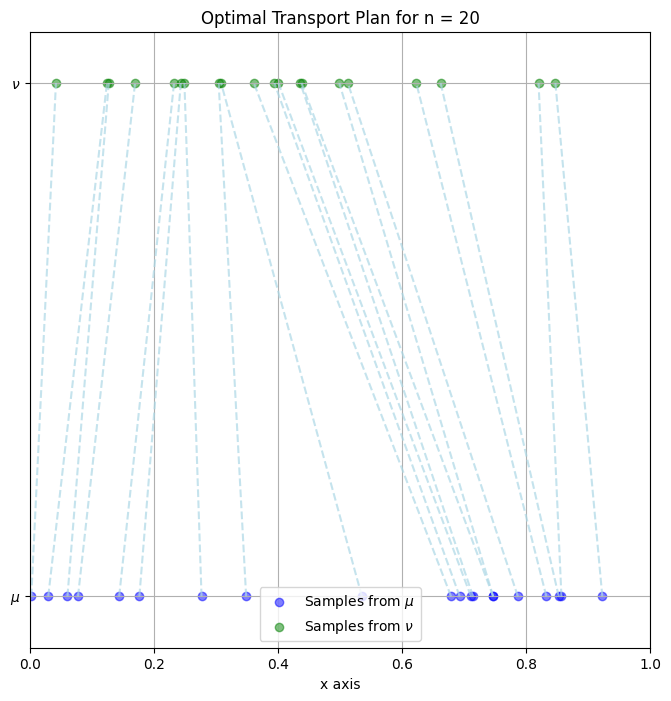

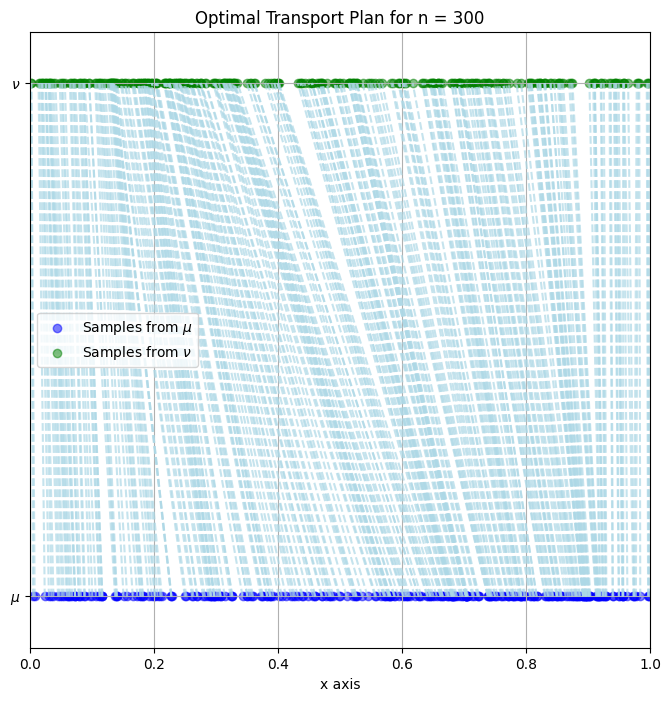

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sample_from_mu(n):
    """Sample n points from the measure mu."""
    samples = np.random.rand(n)
    # Apply quantile function of mu to samples
    samples = np.where(samples < 0.5, (4/3) * samples, (2/3) * samples + (1/3))
    return samples

def sample_from_nu(n):
    """Sample n points from the measure nu."""
    samples = np.random.rand(n)
    # Apply quantile function of nu to samples
    samples = np.where(samples < 0.5, (2/3) * samples, (4/3) * samples - (1/3))
    return samples

def plot_transport_plan(n):
    """Plot the optimal transport plan between empirical distributions."""
    mu_samples = sample_from_mu(n)
    nu_samples = sample_from_nu(n)
    # transport_samples = optimal_transport_map(mu_samples)
    sorted_nu = nu_samples[monge_map(mu_samples, nu_samples)]


    plt.figure(figsize=(8, 8))
    
    # Plot the samples
    plt.scatter(mu_samples, np.zeros(n), color='blue', label=r'Samples from $\mu$', alpha=0.5)
    plt.scatter(nu_samples, np.ones(n), color='green', label=r'Samples from $\nu$', alpha=0.5)
    
    # Draw lines between transported samples and target samples
    for mu, nu in zip(mu_samples, sorted_nu):
        plt.plot([mu, nu], [0, 1], color='lightblue', linestyle='--', alpha=0.7)

    plt.title(f'Optimal Transport Plan for n = {n}')
    plt.xlim(0, 1)
    plt.ylim(-0.1, 1.1)
    plt.xlabel('x axis')
    plt.yticks([0, 1], [r'$\mu$', r'$\nu$'])
    plt.legend()
    plt.grid()
    plt.show()

#================= Visualization ===========================

# Plot for n = 20
plot_transport_plan(20)

# Plot for n = 300
plot_transport_plan(300)


As expected, point associations don't intersect with each other, which is a basic rule of optimal transport.

## 4. Compute the 2-Wasserstein distance between $\mu_n$ and $\nu_n$ and plot it as a function of $n$, for $n = 1$ to $n = 500$. What is the (almost sure) limit of $W_2(\mu_n, \nu_n)$?

#### Expected Result for 2-Wasserstein Distance:

Given the empirical distributions $\mu_n = \frac{1}{n} \sum_{i=1}^{n} \delta_{x_i}$ and $\nu_n = \frac{1}{n} \sum_{i=1}^{n} \delta_{y_i}$, the 2-Wasserstein distance between these empirical measures is denoted by $W_2(\mu_n, \nu_n)^2$. The 2-Wasserstein distance is defined as:

$$
W_2(\mu_n, \nu_n)^2 = \int_0^1 \left| \mathcal{C}_{\mu_n}^{-1}(t) - \mathcal{C}_{\nu_n}^{-1}(t) \right|^2dt,
$$
where $\mathcal{C}_{\mu_n}^{-1}(t)$ and $\mathcal{C}_{\nu_n}^{-1}(t)$ are the quantile functions of the empirical distributions $\mu_n$ and $\nu_n$, respectively.



As $n \to \infty$, the empirical measures $\mu_n$ and $\nu_n$ converge to their respective continuous measures $\mu$ and $\nu$. Under reasonable assumptions, such as compact support and absolute continuity, the 2-Wasserstein distance between the empirical distributions $\mu_n$ and $\nu_n$ converges almost surely to the 2-Wasserstein distance between the continuous measures $\mu$ and $\nu$. That is,

$$
W_2(\mu_n, \nu_n)^2 \xrightarrow{n \to \infty} W_2(\mu, \nu)^2.
$$

Thus, the **almost sure limit** is given by:

$$
\lim_{n \to \infty} W_2(\mu_n, \nu_n)^2 = W_2(\mu, \nu)^2,
$$
where $W_2(\mu, \nu)^2$ is the 2-Wasserstein distance between the original continuous measures $\mu$ and $\nu$. This distance can be computed from the optimal transport map $T$ between these two measures as follow.

Explicitly,
$$
W_2(\mu, \nu)^2 = \int_0^1 \left| \mathcal{C}_{\mu}^{-1}(t) - \mathcal{C}_{\nu}^{-1}(t) \right|^2dt = \frac {1} {27}
$$
$$
\Rightarrow W_2(\mu, \nu) = \frac 1 {3 \sqrt{3}} \simeq 0.192
$$



Using euclidian distances, the limit of the 2-Wasserstein distance between the empirical distributions is nearly equal to 0.195.
Using empirical quantiles, the limit of the 2-Wasserstein distance between the empirical distributions is nearly equal to 0.199.


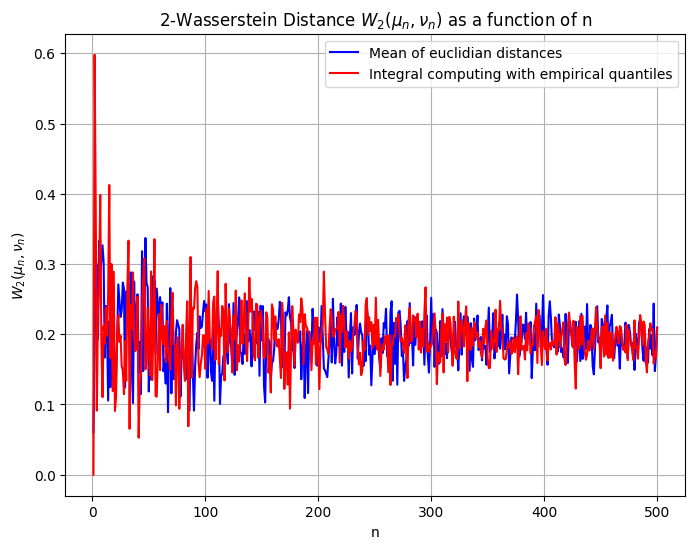

In [5]:
def optimal_transport_map(mu_samples):
    """Apply the optimal transport map T(u) = C_nu^(-1)(C_mu(u)) to sample points."""
    C_mu = np.where(mu_samples < 2/3, (3/4) * mu_samples, (3/2) * mu_samples - 1/2)
    transport_samples = np.where(C_mu < 0.5, (2/3) * C_mu, (4/3) * C_mu - (1/3))
    return transport_samples

def compute_wasserstein_distance(n):
    """Compute the 2-Wasserstein distance between mu_n and nu_n."""
    # Compute the optimal transport between the empirical distributions
    mu_samples = sample_from_mu(n)
    nu_samples = sample_from_nu(n)
    sorted_nu = nu_samples[monge_map(mu_samples, nu_samples)]

    # Compute the average squared distances between mu_samples and their transported counterparts
    squared_distances = (mu_samples - sorted_nu) ** 2
    W2_squared = np.mean(squared_distances)

    # Return W2
    return np.sqrt(W2_squared)

def compute_wasserstein_distance_with_quantiles(n):
    """Compute the 2-Wasserstein distance between mu_n and nu_n."""
    mu_samples = sample_from_mu(n)
    nu_samples = sample_from_nu(n)

    # Generate the quantiles which will be calculated
    t_values = np.linspace(0, 1, n)
    
    # Compute the quantiles of each distribution
    quantiles_mu = np.quantile(mu_samples, t_values)
    quantiles_nu = np.quantile(nu_samples, t_values)
    
    # Compute the 2-wasserstein distance
    squared_diff = (quantiles_mu - quantiles_nu) ** 2
    wass_dist = np.trapezoid(squared_diff, t_values)
    
    return np.sqrt(wass_dist)

def plot_wasserstein_distance():
    """Plot the 2-Wasserstein distance as a function of n."""
    n_values = np.arange(1, 501)
    W2_values = [compute_wasserstein_distance(n) for n in n_values]
    W2_values_quant = [compute_wasserstein_distance_with_quantiles(n) for n in n_values]
    print()
    print(f'Using euclidian distances, the limit of the 2-Wasserstein distance between the empirical distributions is nearly equal to {np.round(np.mean(W2_values[:-200]),3)}.')
    print(f'Using empirical quantiles, the limit of the 2-Wasserstein distance between the empirical distributions is nearly equal to {np.round(np.mean(W2_values_quant[:-200]),3)}.')

    plt.figure(figsize=(8, 6))
    plt.plot(n_values, W2_values, label='Mean of euclidian distances', color='blue')
    plt.plot(n_values, W2_values_quant, label='Integral computing with empirical quantiles', color='red')
    plt.title(r'2-Wasserstein Distance $W_2(\mu_n, \nu_n)$ as a function of n')
    plt.xlabel('n')
    plt.ylabel(r'$W_2(\mu_n, \nu_n)$')
    plt.grid(True)
    plt.legend()
    plt.show()

#================= Plotting ===========================

plot_wasserstein_distance()


The above results shows that with very large n, we tend to the theoretical limit which is $\frac 1 {3 \sqrt 3}$ with both methods.

## 5. Represent the $W_2$ optimal transport geodesic between $\mu_n$ and $\nu_n$ at times $t \in \{0, 1/4, 1/2, 3/4, 1\}$. You can plot for instance the histogram.

_Optional_: do an animation from 0 to 1 instead (using FuncAnimation from matplotlib).

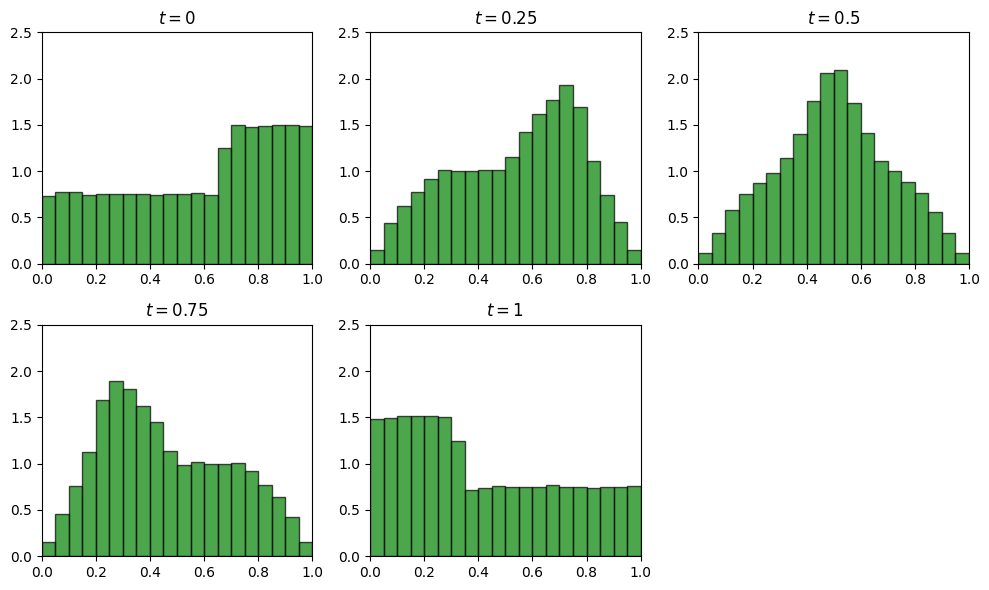

In [6]:
def interpolate_geodesic(mu_samples, nu_samples, t):
    """Compute the geodesic interpolation between mu and nu at time t."""
    return (1 - t) * mu_samples + t * nu_samples

def plot_histograms(mu_samples, nu_samples, n):
    """Plot histograms at t = {0, 1/4, 1/2, 3/4, 1}."""
    times = [0, 0.25, 0.5, 0.75, 1]  # Time points
    plt.figure(figsize=(10, 6))

    for i, t in enumerate(times):
        plt.subplot(2, 3, i + 1)
        geodesic_samples = interpolate_geodesic(mu_samples, nu_samples, t)
        plt.hist(geodesic_samples, bins=20, range=(0, 1), alpha=0.7, color='green', edgecolor='black', density=True)
        plt.title(f'$t = {t}$')
        plt.xlim(0, 1)
        plt.ylim(0, 2.5)

    plt.tight_layout()
    plt.show()

# Sample n points from mu and nu
n = 100000
mu_samples = sample_from_mu(n)
nu_samples = sample_from_nu(n)

# Plot histograms for geodesic transport at t = {0, 1/4, 1/2, 3/4, 1}
plot_histograms(mu_samples, nu_samples, n)


We now consider probability distributions that are given by their discretized density on a uniform grid. More specifically, we consider a fixed uniform grid $(x_i)_{i=1}^n$ on $[0, 1]$ with $x_i = \frac{i}{n} - \frac{1}{2n}$ (say, with $n = 200$) and measures of the form 
$$
\mu_a = \sum_{i=1}^n a_i \delta_{x_i}
$$
with $a \in \mathbb{R}^n$ such that $\sum_{i=1}^n a_i = 1$.

## 6. Write a function that takes as input two $n$-vectors $a$ and $b$ in $\mathbb{R}_+^n$ such that $\sum a_i = \sum b_i = 1$ and returns the discrete optimal transport plan represented by a matrix $P \in \mathbb{R}_+^{n \times n}$.

In [7]:
from scipy.optimize import linprog

def optimal_transport_plan(a, b):
    """
    Compute the optimal transport plan from distribution a to b.
    
    Parameters:
    a (ndarray): Source distribution (1D array, non-negative, sums to 1).
    b (ndarray): Target distribution (1D array, non-negative, sums to 1).
    
    Returns:
    P (ndarray): Optimal transport plan (2D array).
    """
    n = len(a)
    
    # Create the cost matrix C
    x_i = np.linspace(1/(2*n), 1 - 1/(2*n), n)  # create the unniform grid : x_i = i/n - 1/(2n)
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            C[i, j] = (x_i[i] - x_i[j]) ** 2  # Squared distance

    # Flatten the cost matrix for the linear programming problem
    c = C.flatten()
    
    # Constraints
    A_eq = np.zeros((2*n, n*n))
    
    # Source constraints
    for i in range(n):
        A_eq[i, i*n:(i+1)*n] = 1  # For each row (source)
    
    # Target constraints
    for j in range(n):
        A_eq[n + j, j::n] = 1  # For each column (target)
    
    # Right-hand side of the constraints
    b_eq = np.concatenate((a, b))
    
    # Bounds for each variable in P (0 <= P_ij <= inf)
    bounds = [(0, None) for _ in range(n*n)]

    # Solve the linear programming problem
    result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')
    
    # Reshape the result into the transport plan matrix
    P = result.x.reshape((n, n))
    
    return P

# Simple test
a = np.array([1, 0])
b = np.array([1/2, 1/2])
P2 = optimal_transport_plan(a, b)

print("Simple test with n = 2 : Optimal Transport Plan (P):")
print(P2, '\n')

# Example usage:
n = 200

a = np.random.rand(n)
a /= a.sum()  # Ensure that a sums to 1

b = np.random.rand(n)
b /= b.sum()  # Ensure that b sums to 1

P = optimal_transport_plan(a, b)

print("Test with n = 200 : Optimal Transport Plan (P):")
print(P)

Simple test with n = 2 : Optimal Transport Plan (P):
[[ 0.5  0.5]
 [ 0.  -0. ]] 

Test with n = 200 : Optimal Transport Plan (P):
[[0.00404311 0.         0.         ... 0.         0.         0.        ]
 [0.00015786 0.0012799  0.         ... 0.         0.         0.        ]
 [0.         0.0007775  0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.0076106  0.        ]
 [0.         0.         0.         ... 0.         0.00044076 0.00518122]
 [0.         0.         0.         ... 0.         0.         0.00258448]]


Thanks to the first test, we can assume that our algorithm works. Indeed, with distribution a = [1, 0], all the mass is on $x_i = 1/4$. To transport this mass to distribution b = [0.5, 0.5], we have to split the mass in two halves. One stays on $x_i = 1/4$ and the other goes to $x_i = 3/4$. This is exactly what we can read on the first line of the matrix P.

## 7. Let $\mu_a$ and $\mu_b$ be the discretization of truncated Gaussian distributions on $[0,1]$ of (mean, variance) $(0.2, 0.12)$ and $(0.6, 0.22)$ respectively. Do not forget to normalize the weight vectors after discretization. Represent the optimal transport plan in greyscale on $[0, 1]^2$.

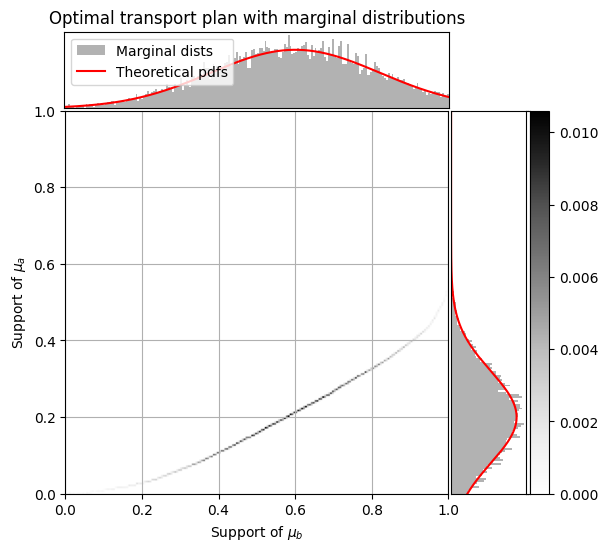

In [8]:
from scipy.stats import truncnorm, norm
from matplotlib.gridspec import GridSpec


def truncated_gaussian_samples(mean, std, lower, upper, n):
    """Generate truncated Gaussian samples."""
    # Calculate the bounds for the truncated Gaussian
    a, b = (lower - mean) / std, (upper - mean) / std # Calculate lower and upper in "std unit"
    samples = truncnorm.rvs(a, b, loc=mean, scale=std, size=n)
    return samples


def normalize_weights(weights):
    """Normalize the weight vector."""
    return weights / np.sum(weights)


def visualize_optimal_transport_plan_with_hist(P, samples_a, samples_b, mean_a, std_a, mean_b, std_b, n):
    """Visualize the optimal transport plan with marginal histograms."""
    # Create figure and main axis for the transport plan
    fig = plt.figure(figsize=(7, 6))
    gs = GridSpec(2, 3, width_ratios=[5, 1, 1], height_ratios=[1, 5], wspace=0.01, hspace=0.01)

    # Vector for theoretical distribution plots
    x = np.linspace(0, 1, 1000)

    
    # Main plot for the optimal transport plan matrix
    ax_main = fig.add_subplot(gs[1, 0])
    cax = ax_main.imshow(P, origin='lower', cmap='Greys', extent=(0, 1, 0, 1))
    ax_main.set_xlabel(r'Support of $\mu_b$')
    ax_main.set_ylabel(r'Support of $\mu_a$')
    ax_main.grid(True)
    
    # Marginal distribution for distribution A (on the right side)
    ax_hist_a = fig.add_subplot(gs[1, 1], sharey=ax_main)
    ax_hist_a.hist(samples_a, bins=n, range=(0, 1), color='gray', alpha=0.6, density=True, orientation='horizontal')
    ax_hist_a.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)  # Remove ticks
    pdf_a = norm.pdf(x, loc=mean_a, scale=std_a) # Theoretical probabilistic distribution function (pdf)
    ax_hist_a.plot(pdf_a, x, 'r')
    
    # Marginal distribution for Distribution B (on the top side)
    ax_hist_b = fig.add_subplot(gs[0, 0], sharex=ax_main)
    ax_hist_b.hist(samples_b, bins=n, range=(0, 1), color='gray', alpha=0.6, density=True, label='Marginal dists')
    # hist_b, bin_edges_b = np.histogram(samples_b, bins=n, range=(0, 1), density=True)
    # ax_hist_b.plot(bin_edges_b[:-1], hist_b, color='red', lw=2)
    ax_hist_b.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)  # Remove ticks
    ax_hist_b.set_title('Optimal transport plan with marginal distributions')
    pdf_b = norm.pdf(x, loc=mean_b, scale=std_b) # Theoretical probabilistic distribution function (pdf)
    ax_hist_b.plot(x, pdf_b, 'r', label='Theoretical pdfs')
    ax_hist_b.legend()

    # Color bar for the transport plan matrix
    ax_bar = fig.add_subplot(gs[1, 2], sharey=ax_main)
    fig.colorbar(cax, ax=ax_bar, fraction=1, pad=0.05)
    ax_bar.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)  # Remove ticks

    plt.show()


# Parameters
n = 200
mean_a, std_a = 0.2, 0.12
mean_b, std_b = 0.6, 0.22
lower, upper = 0, 1

# Generate truncated Gaussian samples
samples_a = truncated_gaussian_samples(mean_a, std_a, lower, upper, 10000)
samples_b = truncated_gaussian_samples(mean_b, std_b, lower, upper, 10000)

# Create histograms (weights)
hist_a, bin_edges_a = np.histogram(samples_a, bins=n, range=(lower, upper), density=True)
hist_b, bin_edges_b = np.histogram(samples_b, bins=n, range=(lower, upper), density=True)

# Normalize weights
a = normalize_weights(hist_a)
b = normalize_weights(hist_b)

# Compute the optimal transport plan
P = optimal_transport_plan(a, b)

# Visualize the optimal transport plan
visualize_optimal_transport_plan_with_hist(P, samples_a, samples_b, mean_a, std_a, mean_b, std_b, n)


Transported mass is high from a gaussian mean to the other because these are the places where mass is the most concentrated.

Moreover, we can see that the marginal distributions are very close to the theoretical distributions of $\mu_a$ ans $\mu_b$.

## 8. Because of the discretization, we see that the optimal transport plan is not deterministic (while it should be in the continuous world). A workaround is to define the **barycentric projection map** 

$$T(x_i) = \frac{\sum_{j=1}^{n} x_j P_{i,j}}{\sum_{j=1}^{n} P_{i,j}}$$

which is well-defined whenever $a_i = \sum_{j=1}^{n} P_{i,j} > 0$. Using this map, plot the (approximate) geodesic between $\mu_a$ and $\mu_b$ at times $t \in \{0, 1/4, 1/2, 3/4, 1\}$.

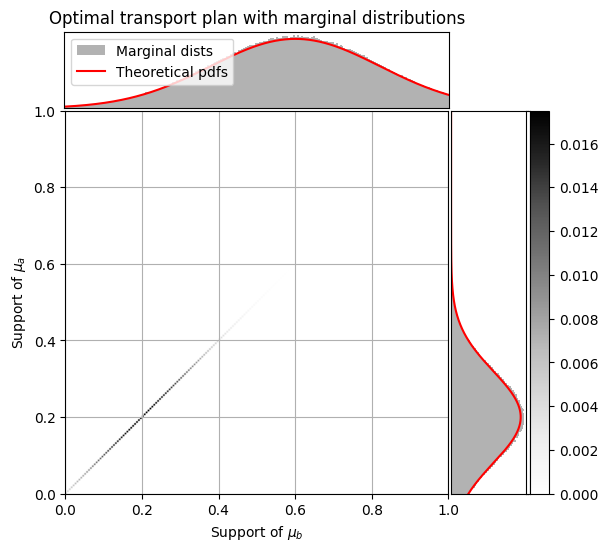

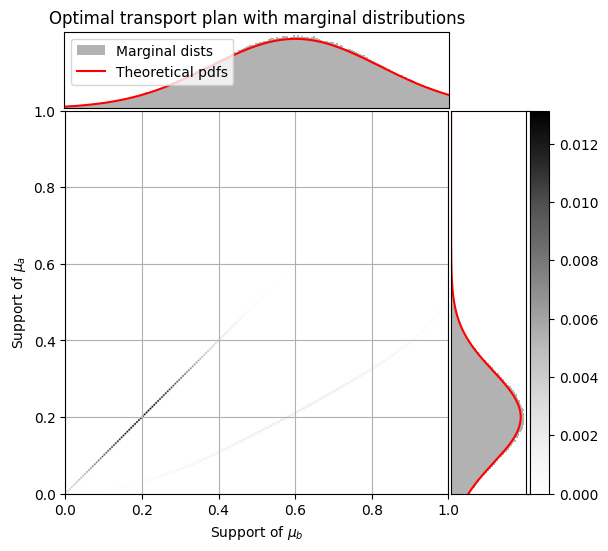

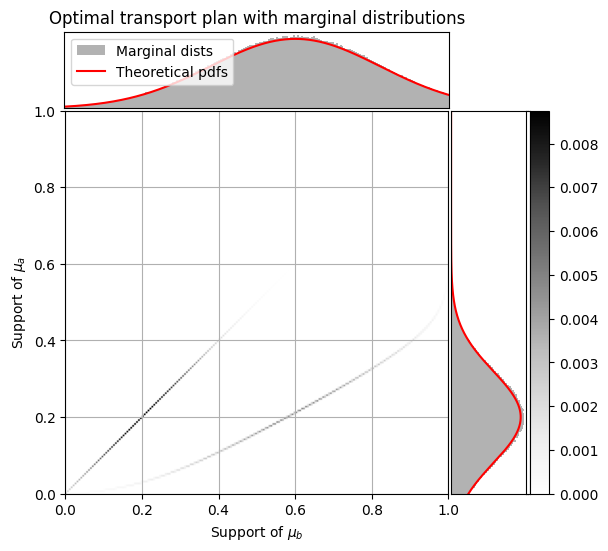

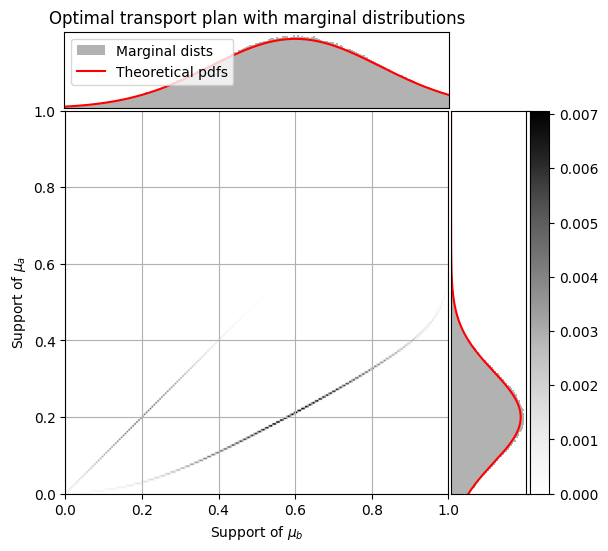

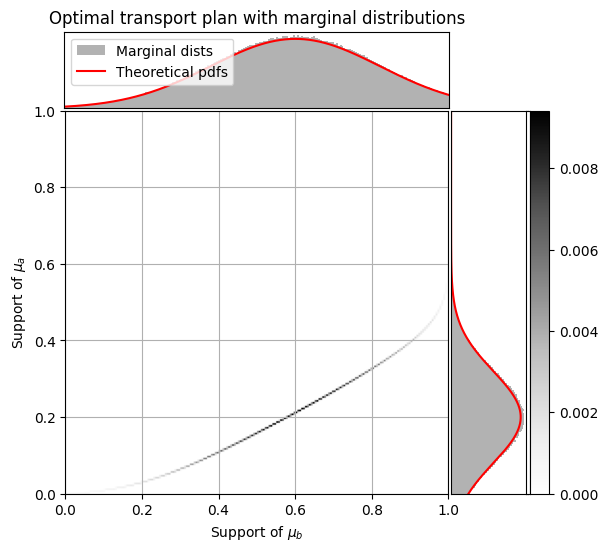

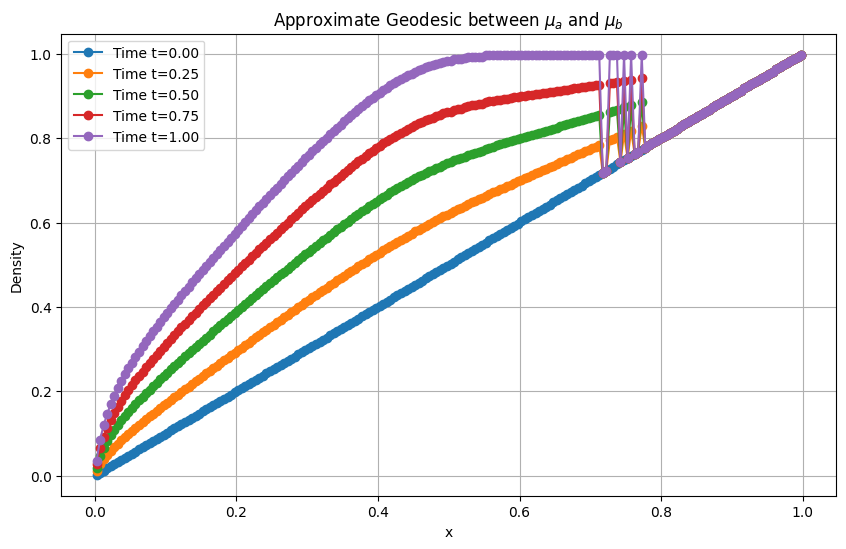

In [9]:

def barycentric_projection(P, x_i):
    """Compute the barycentric projection map."""
    n = len(x_i)
    T = np.zeros(n)
    
    for i in range(n):
        if np.sum(P[i, :]) > 0:
            T[i] = np.sum(x_i * P[i, :]) / np.sum(P[i, :])
        else:
            T[i] = x_i[i]  # Keep the same if no mass is transported to this index

    return T

def plot_geodesics(P, x_i, t_values):
    """Plot the geodesic at specified times."""
    n = len(x_i)
    geodesics = []

    P_0 = optimal_transport_plan(a, a)

    for t in t_values:
        # Compute the weighted transport plan
        P_t = (1 - t) * P_0 + t * P
        visualize_optimal_transport_plan_with_hist(P_t, samples_a, samples_b, mean_a, std_a, mean_b, std_b, n)
        barycenter = barycentric_projection(P_t, x_i)
        geodesics.append(barycenter)
    
    # Plotting the geodesics
    plt.figure(figsize=(10, 6))
    for i, barycenter in enumerate(geodesics):
        plt.plot(x_i, barycenter, label=f'Time t={t_values[i]:.2f}', marker='o')
    
    plt.title(r'Approximate Geodesic between $\mu_a$ and $\mu_b$')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    plt.show()

# Parameters
n = 200
mean_a, std_a = 0.2, 0.12
mean_b, std_b = 0.6, 0.22
lower, upper = 0, 1

# Generate truncated Gaussian samples
samples_a = truncated_gaussian_samples(mean_a, std_a, lower, upper, 1000000)
samples_b = truncated_gaussian_samples(mean_b, std_b, lower, upper, 1000000)

# Create histograms (weights)
hist_a, bin_edges_a = np.histogram(samples_a, bins=n, range=(lower, upper), density=True)
hist_b, bin_edges_b = np.histogram(samples_b, bins=n, range=(lower, upper), density=True)

# Normalize weights
a = normalize_weights(hist_a)
b = normalize_weights(hist_b)

# Compute the optimal transport plan
P = optimal_transport_plan(a, b)

# Define the grid points
x_i = np.linspace(1/(2*n), 1 - 1/(2*n), n)

# Time values for the geodesic
t_values = [0, 0.25, 0.5, 0.75, 1]

# Plot the geodesics
plot_geodesics(P, x_i, t_values)


## 9. (optional) Remember the weird slide about histogram transfer between two images? Try to implement it using optimal transport. Download one b&w image, read the documentation of PIL (Python Imaging Library) and try to transfer the histogram of the image to a new one.

In [10]:
# CODE HERE